# **Air Quality Index Prediction with Machine Learning**

---

## Table of Contents
1. [Introduction](#1-introduction)
2. [Data Loading and Overview](#data-loading-and-overview)
3. [Data Cleaning & Preprocessing](#data-cleaning--preprocessing)
4. [Feature and Target Split](#feature-and-target-split)
5. [Model Training - Individual Models](#model-training---individual-models)
6. [Ensemble Models - Voting and Stacking](#ensemble-models---voting-and-stacking)
7. [Evaluation & Comparison](#evaluation--comparison)
8. [Saving the Final Model](#saving-the-final-model)
9. [Model Comparison Chart](#model-comparison-chart)
10. [Deployment Script](#deployment-script)

---


## **1. Introduction**
This project demonstrates how to predict AQI using regression models and ensemble learning. It includes data preprocessing, model building, evaluation, and deployment.

##**2. Data Loading and Overview**


In [4]:
import pandas as pd
City_Data = pd.read_csv('city_day.csv')
City_Data.info()
City_Data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


##**3. Data Cleaning & Preprocessing**

In [5]:
missing = City_Data.isnull().sum()
missing_percent = (missing / len(City_Data)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Missing %': missing_percent})
missing_df.sort_values(by='Missing %', ascending=False)

City_Data = City_Data.drop(columns=['Xylene'])
City_Data = City_Data.dropna(subset=['AQI', 'AQI_Bucket'])
City_Data['Date'] = pd.to_datetime(City_Data['Date'])
City_Data.isnull().sum()

numeric_cols = City_Data.select_dtypes(include='number').columns.tolist()
numeric_cols.remove('AQI')

for col in numeric_cols:
    City_Data[col] = City_Data[col].fillna(City_Data[col].mean())
City_Data[numeric_cols].isnull().sum()

,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0
O3,0
Benzene,0


##**4. Feature and Target Split**

In [6]:
from sklearn.model_selection import train_test_split
X = City_Data[numeric_cols]
y = City_Data['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##**5. Model Training - Individual Models**

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [8]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [9]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [10]:
# XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [12]:
# Gradient Boosting
gbr_model = GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=5, random_state=42)
gbr_model.fit(X_train, y_train)
gbr_pred = gbr_model.predict(X_test)

In [13]:
# LightGBM
lgb_model = LGBMRegressor(n_estimators=150, learning_rate=0.1, max_depth=5, random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003970 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 19880, number of used features: 11
[LightGBM] [Info] Start training from score 166.818360
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

##**6. Ensemble Models - Voting and Stacking**

In [14]:
from sklearn.ensemble import StackingRegressor, VotingRegressor

voting_model = VotingRegressor(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('gbr', gbr_model)
]).fit(X_train, y_train)
voting_pred = voting_model.predict(X_test)

stacking_model = StackingRegressor(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('gbr', gbr_model)],
    final_estimator=LinearRegression(),
    cv=5
).fit(X_train, y_train)
stacking_pred = stacking_model.predict(X_test)

##**7. Evaluation and Comparison**

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

results = []

def evaluate(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    results.append((name, mae, rmse, r2))
    print(f"{name:<25} => MAE: {mae:.2f}, RMSE: {rmse:.2f}, R^2: {r2:.4f}")

evaluate("Linear Regression", y_test, lr_pred)
evaluate("Random Forest", y_test, rf_pred)
evaluate("XGBoost", y_test, xgb_pred)
evaluate("Gradient Boosting", y_test, gbr_pred)
evaluate("LightGBM", y_test, lgb_pred)
evaluate("Voting Regressor", y_test, voting_pred)
evaluate("Stacking Regressor", y_test, stacking_pred)

Linear Regression         => MAE: 31.21, RMSE: 59.11, R^2: 0.8092
Random Forest             => MAE: 20.76, RMSE: 40.58, R^2: 0.9101
XGBoost                   => MAE: 21.56, RMSE: 42.26, R^2: 0.9025
Gradient Boosting         => MAE: 21.72, RMSE: 40.66, R^2: 0.9097
LightGBM                  => MAE: 21.88, RMSE: 41.87, R^2: 0.9043
Voting Regressor          => MAE: 20.82, RMSE: 39.99, R^2: 0.9127
Stacking Regressor        => MAE: 20.82, RMSE: 39.75, R^2: 0.9137


##**8. Model Comparison Chart**

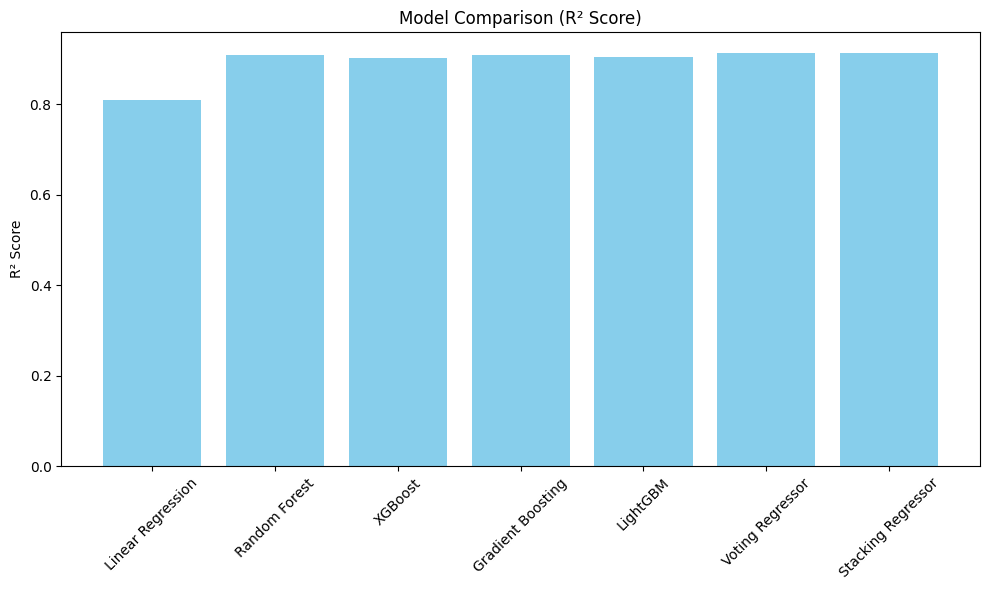

In [16]:
import matplotlib.pyplot as plt
results_df = pd.DataFrame(results, columns=['Model', 'MAE', 'RMSE', 'R2'])
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['R2'], color='skyblue')
plt.title("Model Comparison (R² Score)")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##**9. Saving the Final Model**

In [17]:
import joblib
joblib.dump(stacking_model, "stacked_aqi_model.pkl")

['stacked_aqi_model.pkl']

##**10. Deployment Script**

In [23]:
import joblib
import numpy as np
import pandas as pd

feature_names = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
                 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']

sample_input = pd.DataFrame([[80, 110, 30, 20, 45, 12, 1.1, 9, 18, 4.5, 3]],
                            columns=feature_names)

model = joblib.load("stacked_aqi_model.pkl")

predicted_aqi = model.predict(sample_input)

print("Predicted AQI:", predicted_aqi[0])


Predicted AQI: 166.75319711700354
